# Stock_price_prediction_by_FbProphet

In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

import shutil

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,8

import seaborn as sns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

Importing plotly failed. Interactive plots will not work.


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df1 = pd.read_csv('Quote-Equity-TECHM-EQ-01-07-2020-to-01-07-2021.csv',index_col='Date ', parse_dates=True)
df1 = df1.dropna()
print('shape of Date :',df1.shape)

df2 = pd.read_csv('Quote-Equity-TECHM-EQ-01-07-2021-to-01-07-2022.csv',index_col='Date ', parse_dates=True)
df2 = df2.dropna()
print('shape of Date :',df2.shape)

df3 = pd.read_csv('Quote-Equity-TECHM-EQ-01-07-2022-to-01-07-2023.csv',index_col='Date ', parse_dates=True)
df3 = df3.dropna()
print('shape of Date :',df3.shape)

shape of Date : (252, 13)
shape of Date : (250, 13)
shape of Date : (247, 13)


### Removing Duplicate Labels

In [5]:
df2 = df2.drop('2021-07-01')
df3 = df3.drop('2022-07-01')

###### Combining df1, df2 & df3

In [6]:
data = pd.concat([df1, df2, df3], axis=0)
data

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2021-07-01,EQ,"1,096.00","1,099.35","1,081.00","1,095.45","1,085.65","1,085.15","1,087.08","1,109.40",536.05,"1,459,518","1,586,616,040.75","49,293"
2021-06-30,EQ,"1,088.20","1,105.00","1,083.30","1,088.15","1,096.70","1,095.45","1,096.06","1,109.40",536.05,"1,917,370","2,101,552,386.75","47,775"
2021-06-29,EQ,"1,109.00","1,109.40","1,083.00","1,105.10","1,088.95","1,088.15","1,095.11","1,109.40",536.05,"2,956,332","3,237,521,521.85","64,875"
2021-06-28,EQ,"1,091.00","1,108.00","1,081.10","1,089.50","1,105.05","1,105.10","1,097.40","1,108.00",536.05,"2,143,755","2,352,551,584.20","50,162"
2021-06-25,EQ,"1,087.40","1,103.20","1,077.00","1,080.00","1,085.95","1,089.50","1,090.65","1,103.20",536.05,"3,200,049","3,490,121,301.75","73,477"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-08,EQ,"1,031.00","1,034.70","1,014.55","1,020.75","1,028.50","1,026.50","1,025.27","1,838.00",943.7,"2,841,036","2,912,839,394.40","82,047"
2022-07-07,EQ,"1,020.95","1,026.90","1,016.00","1,009.90","1,021.00","1,020.75","1,021.66","1,838.00",943.7,"1,901,699","1,942,888,370.90","57,171"
2022-07-06,EQ,"1,008.00","1,014.90","1,001.60","1,003.20","1,013.25","1,009.90","1,008.74","1,838.00",943.7,"2,188,175","2,207,292,933.95","60,372"


In [7]:
data.sort_index(axis=0)
data.isna().sum()
data = data.asfreq('D')


data = data.sort_index(axis=0)
data
data.isna().sum()

data = data.ffill()

data

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2020-07-01,EQ,544.00,547.35,536.05,543.40,546.75,545.90,542.17,845.90,471.4,"3,662,565","1,985,749,688.80","106,942"
2020-07-02,EQ,549.90,562.50,542.50,545.90,562.50,560.85,554.33,845.90,471.4,"5,966,758","3,307,566,871.05","156,600"
2020-07-03,EQ,565.90,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,"4,007,492","2,267,963,345.30","112,355"
2020-07-04,EQ,565.90,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,"4,007,492","2,267,963,345.30","112,355"
2020-07-05,EQ,565.90,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,"4,007,492","2,267,963,345.30","112,355"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,EQ,"1,112.20","1,126.00","1,108.30","1,115.50","1,113.25","1,111.90","1,117.85","1,165.00",965.05,"1,432,154","1,600,933,735.00","61,798"
2023-06-27,EQ,"1,109.00","1,121.00","1,106.70","1,111.90","1,120.50","1,119.70","1,114.91","1,165.00",965.05,"1,227,245","1,368,271,265.75","34,059"
2023-06-28,EQ,"1,120.00","1,126.95","1,104.70","1,119.70","1,108.25","1,108.10","1,114.89","1,165.00",965.05,"1,876,800","2,092,426,070.10","60,527"


###### Converting datatypes with sutable dtype

In [8]:
# Step 1: Remove any non-numeric characters (e.g., comma) from the all the columns


data['close '] = data['close '].str.replace(',','')
data['OPEN '] = data['OPEN '].str.replace(',','')
data['HIGH '] = data['HIGH '].str.replace(',','')
data['LOW '] = data['LOW '].str.replace(',','')
data['VOLUME '] = data['VOLUME '].str.replace(',','')

# Step 2: Convert the all columns to float datatype using astype()

data['close '] = data['close '].astype(float)
data['OPEN '] = data['OPEN '].astype(float)
data['HIGH '] = data['HIGH '].astype(float)
data['LOW '] = data['LOW '].astype(float)
data['VOLUME '] = data['VOLUME '].astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-07-01 to 2023-06-30
Freq: D
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series         1095 non-null   object 
 1   OPEN           1095 non-null   float64
 2   HIGH           1095 non-null   float64
 3   LOW            1095 non-null   float64
 4   PREV. CLOSE    1095 non-null   object 
 5   ltp            1095 non-null   object 
 6   close          1095 non-null   float64
 7   vwap           1095 non-null   object 
 8   52W H          1095 non-null   object 
 9   52W L          1095 non-null   object 
 10  VOLUME         1095 non-null   float64
 11  VALUE          1095 non-null   object 
 12  No of trades   1095 non-null   object 
dtypes: float64(5), object(8)
memory usage: 119.8+ KB


In [10]:
data.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2020-07-01,EQ,544.0,547.35,536.05,543.40,546.75,545.90,542.17,845.90,471.4,3662565.0,"1,985,749,688.80","106,942"
2020-07-02,EQ,549.9,562.50,542.50,545.90,562.50,560.85,554.33,845.90,471.4,5966758.0,"3,307,566,871.05","156,600"
2020-07-03,EQ,565.9,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,4007492.0,"2,267,963,345.30","112,355"
2020-07-04,EQ,565.9,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,4007492.0,"2,267,963,345.30","112,355"
2020-07-05,EQ,565.9,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,4007492.0,"2,267,963,345.30","112,355"


In [11]:
data.columns

Index(['series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ',
       'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades '],
      dtype='object')

In [12]:
data.reset_index(inplace=True)
data.rename(columns={'index': 'Date'}, inplace=True)

In [13]:
data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [14]:
data

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2020-07-01,EQ,544.00,547.35,536.05,543.40,546.75,545.90,542.17,845.90,471.4,3662565.0,"1,985,749,688.80","106,942"
1,2020-07-02,EQ,549.90,562.50,542.50,545.90,562.50,560.85,554.33,845.90,471.4,5966758.0,"3,307,566,871.05","156,600"
2,2020-07-03,EQ,565.90,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,4007492.0,"2,267,963,345.30","112,355"
3,2020-07-04,EQ,565.90,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,4007492.0,"2,267,963,345.30","112,355"
4,2020-07-05,EQ,565.90,572.25,561.05,560.85,565.35,567.20,565.93,845.90,471.4,4007492.0,"2,267,963,345.30","112,355"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-06-26,EQ,1112.20,1126.00,1108.30,"1,115.50","1,113.25",1111.90,"1,117.85","1,165.00",965.05,1432154.0,"1,600,933,735.00","61,798"
1091,2023-06-27,EQ,1109.00,1121.00,1106.70,"1,111.90","1,120.50",1119.70,"1,114.91","1,165.00",965.05,1227245.0,"1,368,271,265.75","34,059"
1092,2023-06-28,EQ,1120.00,1126.95,1104.70,"1,119.70","1,108.25",1108.10,"1,114.89","1,165.00",965.05,1876800.0,"2,092,426,070.10","60,527"
1093,2023-06-29,EQ,1120.00,1126.95,1104.70,"1,119.70","1,108.25",1108.10,"1,114.89","1,165.00",965.05,1876800.0,"2,092,426,070.10","60,527"


In [15]:
data  = data[['Date ', 'close ']]
data

,Date,close
0,2020-07-01,545.90
1,2020-07-02,560.85
2,2020-07-03,567.20
3,2020-07-04,567.20
4,2020-07-05,567.20
...,...,...
1090,2023-06-26,1111.90
1091,2023-06-27,1119.70
1092,2023-06-28,1108.10
1093,2023-06-29,1108.10


### Change the column name

In [16]:
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2020-07-01,545.90
1,2020-07-02,560.85
2,2020-07-03,567.20
3,2020-07-04,567.20
4,2020-07-05,567.20


In [17]:
data.isna().sum()

ds    0
y     0
dtype: int64

In [18]:
# data['ds']=pd.to_datetime(data['ds']) # coverting date column into actual date column so that pandas can understand these are the actual date column
# data.tail()

###### Plot the dataset

<Axes: xlabel='ds'>

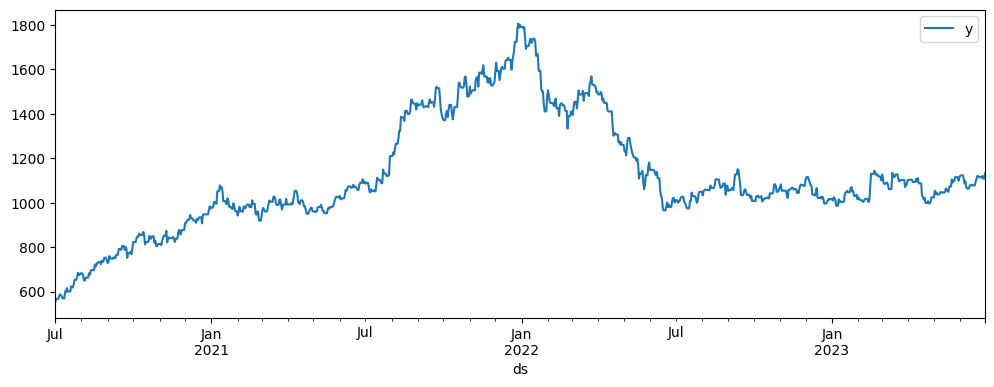

In [19]:
data.plot(x='ds', y='y', figsize=(12,4))

In [20]:
len(data)

1095

### Train , Test , Split

In [21]:
train = data.iloc[:len(data)-365]
test = data.iloc[len(data)-365:]

In [22]:
print(train.shape, test.shape)

(730, 2) (365, 2)


### Start Making Prediction

In [23]:
m = Prophet() # initialize the model

In [24]:
m.fit(train) # fit to training data

12:09:59 - cmdstanpy - INFO - Chain [1] start processing
12:10:02 - cmdstanpy - INFO - Chain [1] done processing
12:10:02 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
12:10:02 - cmdstanpy - INFO - Chain [1] start processing
12:10:02 - cmdstanpy - INFO - Chain [1] done processing
12:10:02 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\Digvijay Mohite\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=34212 data file=C:\Users\DIGVIJ~1\AppData\Local\Temp\tmpazl05q34\abso8h9s.json init=C:\Users\DIGVIJ~1\AppData\Local\Temp\tmpazl05q34\pg5ef902.json output file=C:\Users\DIGVIJ~1\AppData\Local\Temp\tmpazl05q34\prophet_model7bphy14j\prophet_model-20230706121002.csv method=optimize algorithm=newton iter=10000' failed: 

In [ ]:
m.component_modes # to check which modes we cam use as regressor

In [ ]:
test

In [ ]:
# Creating future dates
future_date = m.make_future_dataframe(periods=730,freq='D') # test(365)+future(365)=730
future_date

# 'D' or 'B': Daily frequency
# 'H': Hourly frequency
# 'T' or 'min': Minute frequency
# 'S': Second frequency
# 'W' or 'W-SUN': Weekly frequency, starting on Sundays
# 'M': Month-end frequency , #MS for monthly
# 'Q': Quarter-end frequency
# 'A' or 'Y': Year-end frequency

In [ ]:
forecast = m.predict(future_date)
forecast

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][730:]

### using builtin FB Prophet Visualization

In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

### Evaluate Your Model

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv_m = cross_validation(m,horizon='365 days')
df_cv_m.head(15)

In [ ]:
df_cv_m.tail(40)

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p_m = performance_metrics(df_cv_m)
df_p_m.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_m, metric='rmse')